<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-1---What's-your-pet" data-toc-modified-id="Lesson-1---What's-your-pet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson 1 - What's your pet</a></span><ul class="toc-item"><li><span><a href="#Looking-at-the-data" data-toc-modified-id="Looking-at-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Looking at the data</a></span></li><li><span><a href="#Training:-resnet34" data-toc-modified-id="Training:-resnet34-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Training: resnet34</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Unfreezing,-fine-tuning,-and-learning-rates" data-toc-modified-id="Unfreezing,-fine-tuning,-and-learning-rates-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Unfreezing, fine-tuning, and learning rates</a></span></li><li><span><a href="#Training:-resnet50" data-toc-modified-id="Training:-resnet50-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Training: resnet50</a></span></li><li><span><a href="#Other-data-formats" data-toc-modified-id="Other-data-formats-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Other data formats</a></span></li></ul></li></ul></div>

---
本notebook在fastai v3 课程1的nb基础上，运行出结果后，补充上听第一门课时自己用xmind整理的一些笔记。

<img src="assests/lesson1/lesson1xmind.jpg" width="500">

xmind下载地址[点击这里](https://github.com/greebear/fast.ai-notes/blob/master/xmind/lesson1%20%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB.xmind) 

<font color=gray size=2>本notebook的内容与图片参考于：
<font color=gray size=2>
- fastai v3 lesson1 notebook [Lesson 1 - What's your pet](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb) 
</font>
---

# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

`%reload_ext autoreloa`    在执行用户代码前，重新装入 软件的扩展和模块  
`%autoreload 2`    自动重载%aimport排除的模块之外的所有模块  
`%matplotlib inline`    将matplotlib绘制图像在Jupyter Notebook中展示  

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

**fastai包含以下几部分内容**
- 机器视觉 Computer vision
- 自然语言文本  Natural language text
- 表格数据 Tabular data
- 协同过滤（推荐算法）Collaborative filtering

---
`import *`
- 利用import * 帮助我们在notebook快速交互进行实验
- 在生产中构建服务时，可以采用正常的PEP8风格编码

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

**数据获取途径：**
- 学术数据集 Academic datasets 
    - 学术界花费大量时间来整理和收集数据集
    - 具有挑战性的数据集 需要某种技术突破
- Kaggle竞赛数据集 Kaggle competition datasets
    - 可以将算法提交到kaggle平台查看自己在竞赛中的排名
    - 我们将尝试创造出能够直接进入Kaggle竞赛榜首的模型，最好能进入前10名，而不仅仅是前10%

---
**pet dataset（学术数据集）:**
- 内容：37种不同的狗品种和猫品种
- 原始任务：区分图片是猫还是狗
- 本次任务：细粒度分类 —— 区分37种猫狗品种

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); path

PosixPath('/tmp/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images')]

---
**pathlib** 面向对象的文件系统路径
- path对象比字符串更易使用，python3中的新功能
- 一种新的路径追加方式
    ```python
    path_anno = path/'annotations'
    path_img = path/'images'
    ```

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

---
`from_name_re`
- para：
    - path_img: 包含数据的路径
    - fnames: 包含文件名的列表
    - pat: 提取标签（label）的正则表达式
    - ds_tfm: 数据预处理方法
    - size: 图像大小
- return：
    - databunch对象 
        - 包含训练、验证、测试数据
            - 图像、文本、表格
            - 标签

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_48.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/Abyssinian_172.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/saint_bernard_38.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/newfoundland_85.jpg'),
 PosixPath('/tmp/.fastai/data/oxford-iiit-pet/images/keeshond_140.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

---
`databunch`
- data.normalize 数据归一化
- data.show_batch
    - 展示databunch包含的数据
    - 可以看到采用了默认的“中心裁剪”（center cropping）的数据增强方法
- data.classes
- data.c

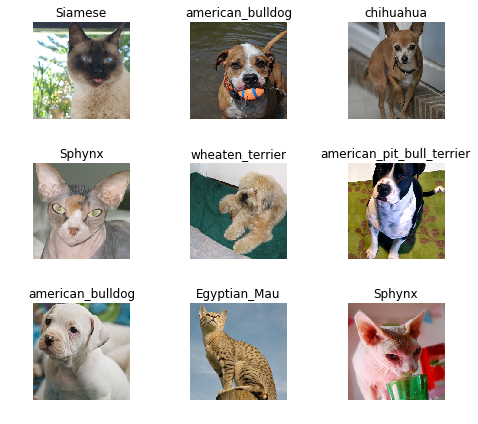

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

---
**模型创建:**
- create_cnn
    - data: DataBunch
    - arch: 模型结构(resnet、vgg...)
    - metrics: 评估指标

- 加载resnet34预训练模型（已在ImageNet数据集150w张图片上完成分类任务训练的模型）

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 25.5MB/s]


In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

**训练**
- 迁移学习 Transfer learning
    - 更少的数据量
    - 更少的训练时间
    - 更好的训练效果
- 过拟合 Overfitting
    - 概念：模型只是学会了如何识别训练图片，而不能识别其他同类型的图片
    - 解决方案：创建一个保证模型无法接触到的验证集，训练过程中打印出验证集的评估指标（如：准确度）
- 拟合模型
    - fit_one_cycle()
        - 一种更准确更快的训练方法，源于论文 https://arxiv.org/abs/1803.09820
        - eg. learn.fit_one_cycle(4)
            - 数字4 为我们遍历数据集的次数
            - 利用几次数据遍历训练，查看模型训练状况
            - 仅1分56秒便得到了6%的错误率
- 模型保存
    - learn.save()

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.383232,0.302859,0.095399,01:25
1,0.614063,0.239038,0.080514,01:25
2,0.390167,0.193559,0.066982,01:26
3,0.280356,0.195831,0.068336,01:25


In [16]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

---
**分析结果 ClassificationInterpretation**
- 该类包含分类模型的解释方法
    - plot_top_losses
        - 绘制出对预测结果最有信心但错误分类的图像
        - 这是最重要的Interpretation工具，帮助我们查看模型哪里出错
        - eg. 
        interp.plot_top_losses(9, figsize=(15,11))
    - plot_confusion_matrix
        - 绘制混淆矩阵
        - eg. interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    - most_confused()
        - 从混淆矩阵中获取预测类别和实际类别相比最混乱、最易出错的组合
        - eg. interp.most_confused(min_val=2)
- eg. interp = ClassificationInterpretation.from_learner(learn)
    - learn需包含：
        - 数据
        - 已经训练过的模型

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

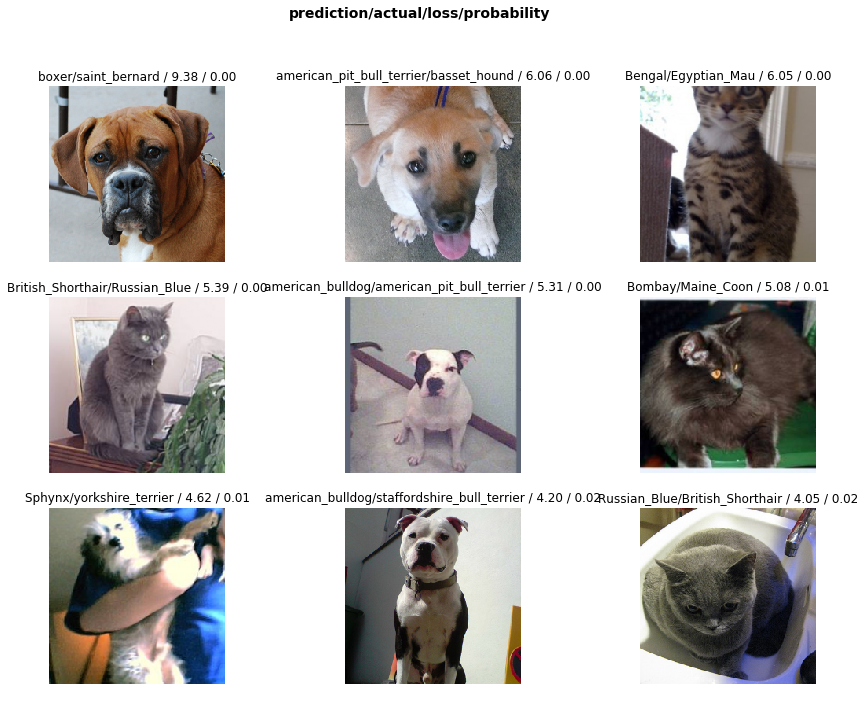

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

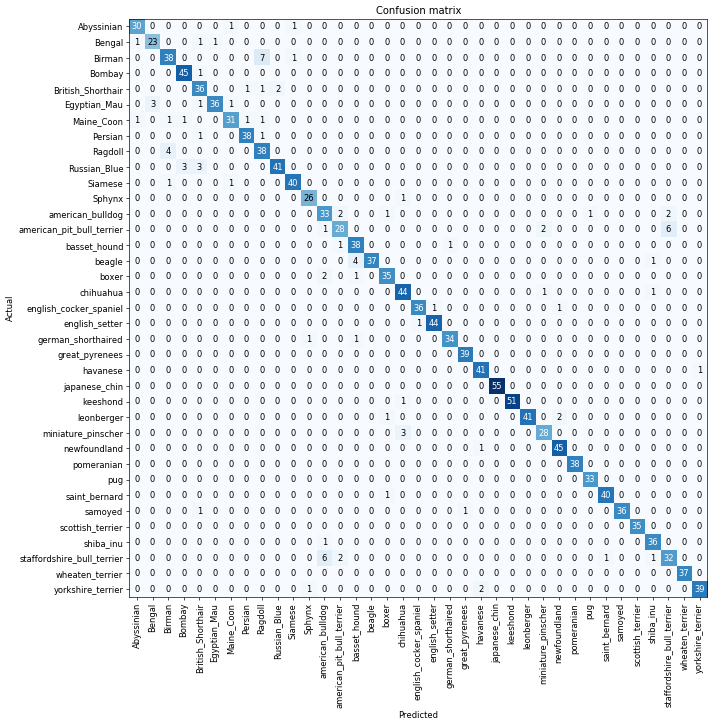

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Ragdoll', 'Birman', 4),
 ('beagle', 'basset_hound', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('leonberger', 'newfoundland', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

---
**优化策略 ：**
- 1. unfreeze模型
- 2. 利用学习率查找器(learning rate finder)，绘制学习率与损失的之间变化图像

![image.png](assests/lesson1/lr_find.jpg)

- 3. max_lr的设置
    - eg. learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))
        - max_lr中的第二部分的学习率(eg. 1e-4)，为模型训练上一阶段学习率的1/10(上一阶段学习率为1e-3)
        - max_lr中的第一部分的学习率(eg. 1e-6)，为图像中loss较低的前部分，并且它在loss发散(本例中大概在1e-4到1e-3之间开始发散)之前。
- 4. 模型不同层设置不同学习率 
    - 模型前面层参数，设置较小学习率(1e-6)
    - 模型后面层参数，设置较大学习率(1e-4)
    - 模型中间层网络，设置的学习率分布于(1e-6, 1e-4)之间

---
`unfreeze()`  解冻模型所有参数，fit模型时可以更新所有参数。

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.669144,0.320135,0.102842,01:27


---
`learn.load()` 加载之前保存的模型

微调模型时，模型性能变差，可以利用它来回滚模型。

In [24]:
lr_find()learn.load('stage-1');

---
`lr_find()` 帮助找出训练神经网络最快速度的方法

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


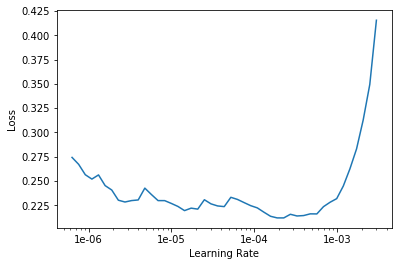

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249251,0.177425,0.060217,01:28
1,0.221189,0.180704,0.063599,01:27


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

---
**GPU RAM问题:**
- 问题：利用更大模型训练时，可能会出现内存不足的问题
- 解决：构建ImageDataBunch时，设置更小的batch size(bs)

In [28]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [29]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 24.9MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


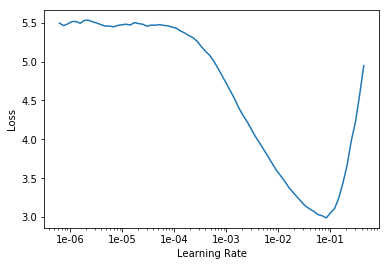

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.698900,0.341795,0.098782,02:08
1,0.501026,0.293797,0.097429,02:06
2,0.424884,0.295715,0.087957,02:08
3,0.318278,0.300986,0.081867,02:06
4,0.257821,0.248001,0.075101,02:08
5,0.168880,0.218477,0.065629,02:06
6,0.148723,0.211912,0.062923,02:06
7,0.097666,0.205015,0.063599,02:07


In [32]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [33]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.105558,0.222239,0.069012,02:11
1,0.096186,0.204806,0.064953,02:12
2,0.081483,0.209959,0.067659,02:12


If it doesn't, you can always go back to your previous model.

In [34]:
learn.load('stage-1-50');

---
优化完成后，再次分析结果

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

In [36]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 6),
 ('Siamese', 'Birman', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Birman', 'Ragdoll', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('beagle', 'basset_hound', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('keeshond', 'leonberger', 2),
 ('saint_bernard', 'boxer', 2),
 ('staffordshire_bull_terrier', 'beagle', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## Other data formats

In [37]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/tmp/.fastai/data/mnist_sample')

In [38]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

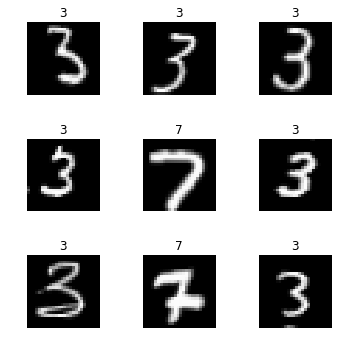

In [39]:
data.show_batch(rows=3, figsize=(5,5))

In [40]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.3MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.190913,0.093900,0.969087,00:19
1,0.116427,0.050665,0.984298,00:19


In [41]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [42]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

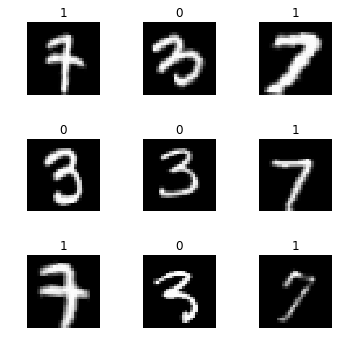

In [43]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [44]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [45]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/tmp/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/tmp/.fastai/data/mnist_sample/train/3/21102.png')]

In [46]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [47]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [48]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [49]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']